In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('listings.csv')

## Cek data type

In [3]:
df.describe(include='all') #cek info statistik, include = 'all' untuk cek juga data type string

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,7.907000e+03,7905,7.907000e+03,7907,7907,7907,7907.000000,7907.000000,7907,7907.000000,7907.000000,7907.000000,5149,5149.000000,7907.000000,7907.000000
unique,NaN,7457,NaN,1833,5,43,NaN,NaN,3,NaN,NaN,NaN,1001,NaN,NaN,NaN
top,NaN,Luxury hostel with in-cabin locker - Single mixed,NaN,Jay,Central Region,Kallang,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-08-12,NaN,NaN,NaN
freq,NaN,13,NaN,290,6309,1043,NaN,NaN,4132,NaN,NaN,NaN,152,NaN,NaN,NaN
mean,2.338862e+07,NaN,9.114481e+07,NaN,NaN,NaN,1.314192,103.848787,NaN,169.332996,17.510054,12.807386,NaN,1.043669,40.607689,208.726318
std,1.016416e+07,NaN,8.190910e+07,NaN,NaN,NaN,0.030577,0.043675,NaN,340.187599,42.094616,29.707746,NaN,1.285851,65.135253,146.120034
min,4.909100e+04,NaN,2.366600e+04,NaN,NaN,NaN,1.243870,103.646560,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,1.582180e+07,NaN,2.305808e+07,NaN,NaN,NaN,1.295795,103.835825,NaN,65.000000,1.000000,0.000000,NaN,0.180000,2.000000,54.000000
50%,2.470627e+07,NaN,6.344891e+07,NaN,NaN,NaN,1.311030,103.849410,NaN,124.000000,3.000000,2.000000,NaN,0.550000,9.000000,260.000000
75%,3.234850e+07,NaN,1.553811e+08,NaN,NaN,NaN,1.322110,103.872535,NaN,199.000000,10.000000,10.000000,NaN,1.370000,48.000000,355.000000


In [6]:
df.head() # cek 5 data teratas

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


In [4]:
df.info() # cek jumlah data dan jenis data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7907 non-null   int64  
 1   name                            7905 non-null   object 
 2   host_id                         7907 non-null   int64  
 3   host_name                       7907 non-null   object 
 4   neighbourhood_group             7907 non-null   object 
 5   neighbourhood                   7907 non-null   object 
 6   latitude                        7907 non-null   float64
 7   longitude                       7907 non-null   float64
 8   room_type                       7907 non-null   object 
 9   price                           7907 non-null   int64  
 10  minimum_nights                  7907 non-null   int64  
 11  number_of_reviews               7907 non-null   int64  
 12  last_review                     51

## Feature selection base on business understanding

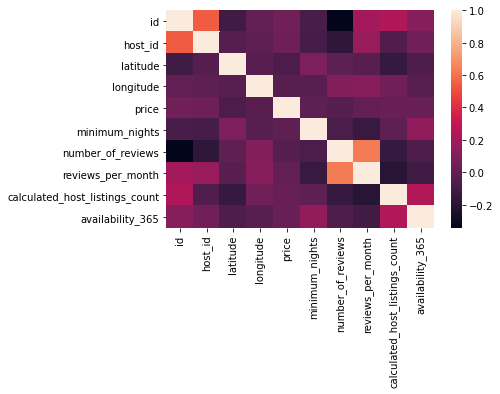

In [4]:
sns.heatmap(df.corr())  #melihat korelasi antar feature
plt.savefig('corr.png')

* Tujuan pembuatan ML ini adalah untuk membantu para host menentukan harga penginapan yang tepat di singapura

apabila dikelompokkan, feature feature diatas dapat dikelompokkan menjadi:
* hotel owner = id, name, host_id, host_name
* lokasi = neighbourhood_group, neighbourhood, latitude, longitude
* spek hotel = room_type, minimum_nights
* review = number_of_reviews, reviews_per_month, last_review
* availability = calculated_host_listings_count, availability_365

berdasarkan heatmap diatas diketahui bahwa
* terdapat korelasi tinggi antara id dan host id. hal ini terjadi karena kedua feature tersebut merupakan data identitas hotel yang terdaftar pada aplikasi
* terdapat korelasi tinggi antara number of reviews dan reviews per month. hal ini terjadi karena reviews per month merupakan feature hasil olahan dari feature number of reviews
* terdapat korelasi sedang antara calculated host listing count dengan availability

berdasarkan kedua penejlasan diatas, maka feature yang akan di drop adalah
* id, name, host_id, host_name, karena feature tersebut merupakan id owner yang sudah terdaftar, dan juga feature tersebut memiliki korelasi antar sesama feature tersebut
* last_review, reviews_per_month, karena kedua feature tersebut dapat dijlaskan oleh feature number_of_reviews

In [6]:
df.columns #cek kolom dalam data set

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [7]:
df = df.drop(['id', 'name', 'host_id', 'host_name', 'last_review', 'reviews_per_month'], axis=1) # menghapus kolom

## Cek missing value

In [9]:
df.isna().sum() #cek missing value menggunakan isna() hasilnya boolean, maka ditambah dengan sum() untuk melihat jumlah true dan flasenya

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

* diketahui tidak terdapat missing value

In [10]:
df.describe(include='all') # cek secara rignkas statistik, inclue all untuk memasukkan data berjenis objek juga

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,7907,7907,7907.000000,7907.000000,7907,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000
unique,5,43,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN
top,Central Region,Kallang,NaN,NaN,Entire home/apt,NaN,NaN,NaN,NaN,NaN
freq,6309,1043,NaN,NaN,4132,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.314192,103.848787,NaN,169.332996,17.510054,12.807386,40.607689,208.726318
std,NaN,NaN,0.030577,0.043675,NaN,340.187599,42.094616,29.707746,65.135253,146.120034
min,NaN,NaN,1.243870,103.646560,NaN,0.000000,1.000000,0.000000,1.000000,0.000000
25%,NaN,NaN,1.295795,103.835825,NaN,65.000000,1.000000,0.000000,2.000000,54.000000
50%,NaN,NaN,1.311030,103.849410,NaN,124.000000,3.000000,2.000000,9.000000,260.000000
75%,NaN,NaN,1.322110,103.872535,NaN,199.000000,10.000000,10.000000,48.000000,355.000000


* terdapat hal janggal dimana harga min adalah 0, maka perlu di ubah terlebih dulu

In [11]:
# mencari 0 pada feature price
df[df['price']==0]

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
3168,Central Region,Rochor,1.30954,103.85271,Entire home/apt,0,3,9,6,351


* hanya teerdapat 1 baris yang mempunyai value 0 pada feature price
* value ini akan diganti menggunakan median, karena dikhawatirkan ada outlier

In [12]:
# mengganti nilai null menjadi nan
df['price'].replace(0, np.NaN, inplace=True)

In [13]:
# mengisi missing value dengan menggunakan median karena ditakutkan ada outlier
df['price'].fillna(df['price'].median(), inplace=True)

In [14]:
df.describe(include='all')

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,7907,7907,7907.000000,7907.000000,7907,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000
unique,5,43,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN
top,Central Region,Kallang,NaN,NaN,Entire home/apt,NaN,NaN,NaN,NaN,NaN
freq,6309,1043,NaN,NaN,4132,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.314192,103.848787,NaN,169.348678,17.510054,12.807386,40.607689,208.726318
std,NaN,NaN,0.030577,0.043675,NaN,340.182650,42.094616,29.707746,65.135253,146.120034
min,NaN,NaN,1.243870,103.646560,NaN,14.000000,1.000000,0.000000,1.000000,0.000000
25%,NaN,NaN,1.295795,103.835825,NaN,65.000000,1.000000,0.000000,2.000000,54.000000
50%,NaN,NaN,1.311030,103.849410,NaN,124.000000,3.000000,2.000000,9.000000,260.000000
75%,NaN,NaN,1.322110,103.872535,NaN,199.000000,10.000000,10.000000,48.000000,355.000000


* Harga terendah sudah tidak lagi nol

## Menangani Outlier

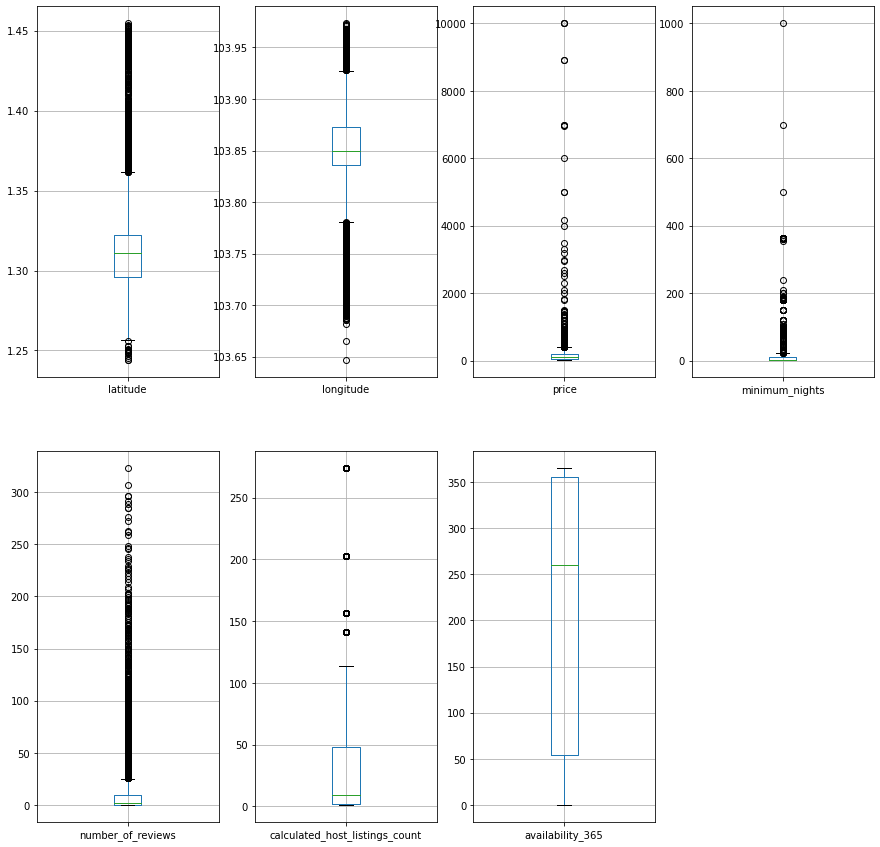

In [16]:
names=['latitude','longitude','price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365'] #membuat variabel berisi feature yg ingin di cek menggunakkan boxplot
plt.figure(figsize=(15,15)) # untuk menentukan besar ukuran figure
for i in range(1,8): #dengan melakukkan for loop untuk mengecek outlier dengan boxplot
    
    plt.subplot(2,4,i)
    fig=df.boxplot(column=names[i-1])

* Dapat dilihat bahwa hanya feature availability yang tidak mempunyai outlier, maka feature yang lain perlu mendapatkan treatment

Previous Shape With Outlier:  (7907, 10)
1.295795 1.3221100000000001
0.02631500000000009
1.2563225 1.3615825000000004
Shape After Removing Outliers: (7907, 10)


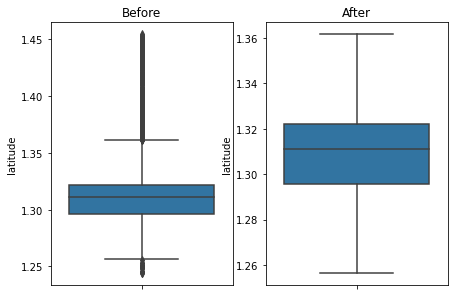

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(1,2) #buat beberapa plot jadi 1 figure
plt.tight_layout(0.2) #margin
print("Previous Shape With Outlier: ",df.shape) #buat liat jumlah baris dan kolom sebelum handle outlier
sns.boxplot(df['latitude'],orient='v',ax=axes[0]) #membuat boxplot sebelum handle outlier
axes[0].title.set_text("Before") #memberi judul pada plot

########### HANDLING OUTLIER ######

Q1 = df.latitude.quantile(0.25) #membuat q1
Q3 = df.latitude.quantile(0.75) #membuat q3
print(Q1,Q3) #print q1 dan q3
IQR = Q3-Q1 #iqr itu box nya yg berisi range dari q1-q3 makannya tadi kita buat q1 dan q3
print(IQR)
lower_limit = Q1 - 1.5*IQR #lowe limit itu lower wishker
upper_limit = Q3 + 1.5*IQR #upper limit itu upper wishker
print(lower_limit,upper_limit)

df2 = df #membuat df baru untuk membedakan hasil pengolahan dan sebelum pengolahan

df2['latitude'] = np.where(df2['latitude']>upper_limit,upper_limit,df2['latitude']) #ketika nilai latitude>upper limit, ganti nilai tersebut dengan upper limit dan di save lagi ke df2
df2['latitude'] = np.where(df2['latitude']<lower_limit,lower_limit,df2['latitude']) #ketika nilai latitude<lower limit, ganti nilai tersebut dengan lower limit dan di save lagi ke df2
print("Shape After Removing Outliers:", df2.shape) #print jumlah kolom dan baris sesudah handle outlier
sns.boxplot(df2['latitude'],orient='v',ax=axes[1]) #buat boxplot untuk data yang sudah di handle outliernya
axes[1].title.set_text("After")
plt.show()

Previous Shape With Outlier:  (7907, 10)
103.835825 103.872535
0.036709999999999354
103.78076 103.9276
Shape After Removing Outliers: (7907, 10)


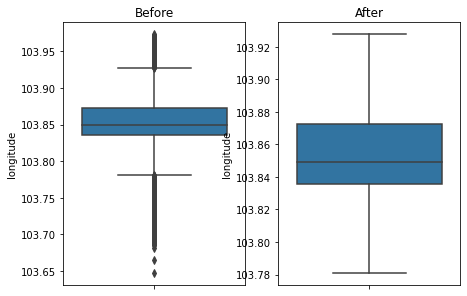

In [18]:
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)
print("Previous Shape With Outlier: ",df.shape)
sns.boxplot(df['longitude'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")

########### HANDLING OUTLIER ######

Q1 = df.longitude.quantile(0.25)
Q3 = df.longitude.quantile(0.75)
print(Q1,Q3)
IQR = Q3-Q1
print(IQR)
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print(lower_limit,upper_limit)

df2 = df

df2['longitude'] = np.where(df2['longitude']>upper_limit,upper_limit,df2['longitude'])
df2['longitude'] = np.where(df2['longitude']<lower_limit,lower_limit,df2['longitude'])
print("Shape After Removing Outliers:", df2.shape)
sns.boxplot(df2['longitude'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

Previous Shape With Outlier:  (7907, 10)
65.0 199.0
134.0
-136.0 400.0
Shape After Removing Outliers: (7907, 10)


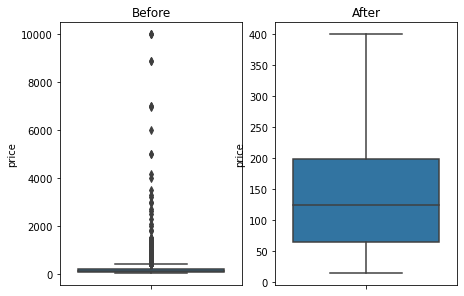

In [19]:
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)
print("Previous Shape With Outlier: ",df.shape)
sns.boxplot(df['price'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")

########### HANDLING OUTLIER ######

Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
print(Q1,Q3)
IQR = Q3-Q1
print(IQR)
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print(lower_limit,upper_limit)

df2 = df

df2['price'] = np.where(df2['price']>upper_limit,upper_limit,df2['price'])
df2['price'] = np.where(df2['price']<lower_limit,lower_limit,df2['price'])
print("Shape After Removing Outliers:", df2.shape)
sns.boxplot(df2['price'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

Previous Shape With Outlier:  (7907, 10)
1.0 10.0
9.0
-12.5 23.5
Shape After Removing Outliers: (7907, 10)


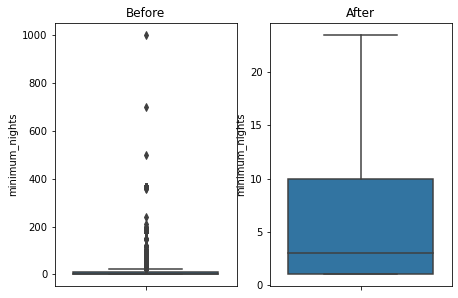

In [20]:
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)
print("Previous Shape With Outlier: ",df.shape)
sns.boxplot(df['minimum_nights'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")

########### HANDLING OUTLIER ######

Q1 = df.minimum_nights.quantile(0.25)
Q3 = df.minimum_nights.quantile(0.75)
print(Q1,Q3)
IQR = Q3-Q1
print(IQR)
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print(lower_limit,upper_limit)

df2 = df

df2['minimum_nights'] = np.where(df2['minimum_nights']>upper_limit,upper_limit,df2['minimum_nights'])
df2['minimum_nights'] = np.where(df2['minimum_nights']<lower_limit,lower_limit,df2['minimum_nights'])
print("Shape After Removing Outliers:", df2.shape)
sns.boxplot(df2['minimum_nights'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

Previous Shape With Outlier:  (7907, 10)
0.0 10.0
10.0
-15.0 25.0
Shape After Removing Outliers: (7907, 10)


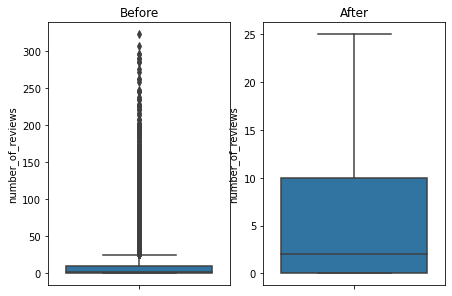

In [21]:
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)
print("Previous Shape With Outlier: ",df.shape)
sns.boxplot(df['number_of_reviews'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")

########### HANDLING OUTLIER ######

Q1 = df.number_of_reviews.quantile(0.25)
Q3 = df.number_of_reviews.quantile(0.75)
print(Q1,Q3)
IQR = Q3-Q1
print(IQR)
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print(lower_limit,upper_limit)

df2 = df

df2['number_of_reviews'] = np.where(df2['number_of_reviews']>upper_limit,upper_limit,df2['number_of_reviews'])
df2['number_of_reviews'] = np.where(df2['number_of_reviews']<lower_limit,lower_limit,df2['number_of_reviews'])
print("Shape After Removing Outliers:", df2.shape)
sns.boxplot(df2['number_of_reviews'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

Previous Shape With Outlier:  (7907, 10)
2.0 48.0
46.0
-67.0 117.0
Shape After Removing Outliers: (7907, 10)


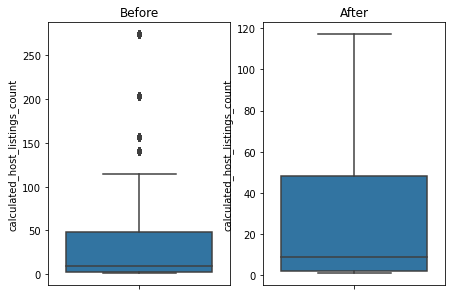

In [22]:
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)
print("Previous Shape With Outlier: ",df.shape)
sns.boxplot(df['calculated_host_listings_count'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")

########### HANDLING OUTLIER ######

Q1 = df.calculated_host_listings_count.quantile(0.25)
Q3 = df.calculated_host_listings_count.quantile(0.75)
print(Q1,Q3)
IQR = Q3-Q1
print(IQR)
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print(lower_limit,upper_limit)

df2 = df

df2['calculated_host_listings_count'] = np.where(df2['calculated_host_listings_count']>upper_limit,upper_limit,df2['calculated_host_listings_count'])
df2['calculated_host_listings_count'] = np.where(df2['calculated_host_listings_count']<lower_limit,lower_limit,df2['calculated_host_listings_count'])
print("Shape After Removing Outliers:", df2.shape)
sns.boxplot(df2['calculated_host_listings_count'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

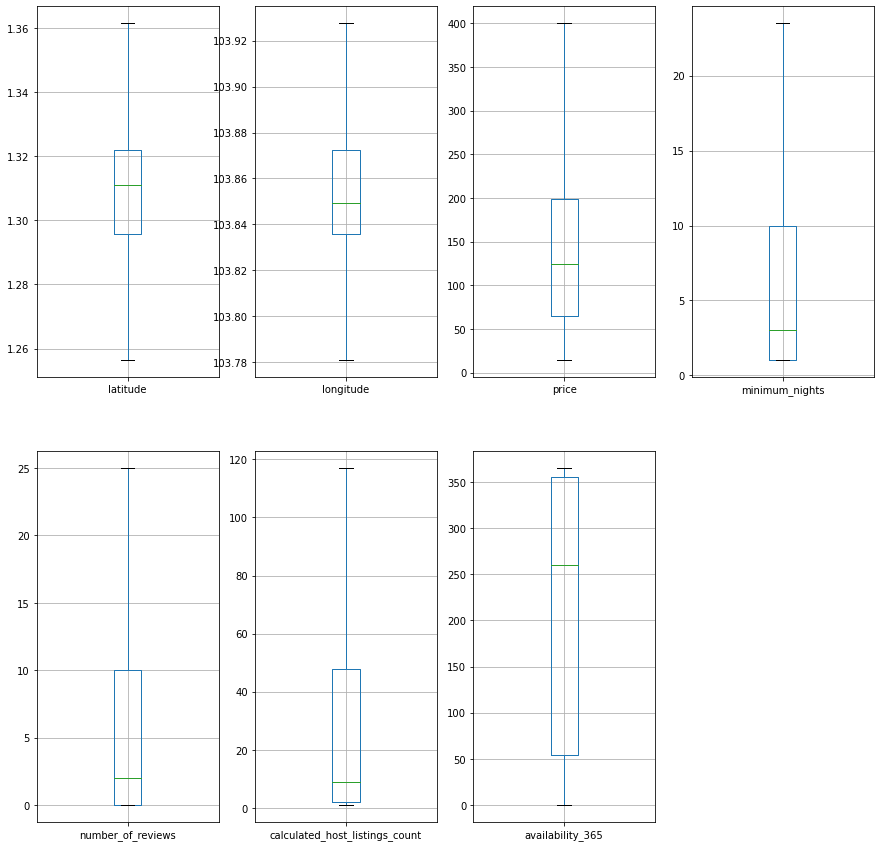

In [23]:
names=['latitude','longitude','price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']
plt.figure(figsize=(15,15))
for i in range(1,8):
    
    plt.subplot(2,4,i)
    fig=df2.boxplot(column=names[i-1])

## Save to csv

In [24]:
# df.to_csv('cleansed.csv', index=False)

In [35]:
# df2.to_csv('cleansed_outlier.csv', index=False)